In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Hackathon_Working_Data.csv')
test=pd.read_csv('Hackathon_Validation_Data.csv')
data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [3]:
data[data['PRICE']==0].shape
# samples having 0 price

(12, 14)

In [4]:
# predicting price for samples having 0.0 price with help of other sample based on same GRP, MBRD and STORECODE 
zero_price_samples=data[['GRP','MBRD','STORECODE']][data['PRICE']==0] 

In [5]:
zero_grp=list(zero_price_samples['GRP'].unique())
zero_grp
# these are GRPs having some zero price

['KETCHUPS/SAUCES',
 'HAIR OILS PKTP(8/02)',
 'WASHING POWDERS/LIQUIDS',
 'CHEESE        (4/94)',
 'TOOTH PASTES',
 'SHAMPOO - BY SEGMENTS',
 'CLEANERS - UTENSIL',
 'REFINED EDIBLE OILS-ALL PACKS']

In [6]:
zero_store=list(zero_price_samples['STORECODE'].unique())
zero_store
#stores having some zero price

['N7', 'N10', 'N1']

In [7]:
zero_mbrd=list(zero_price_samples['MBRD'].unique())
zero_mbrd
# MBRD for samples having zero price

['FUN FOODS',
 'NAVRATNA',
 'RIN',
 'BRITANNIA',
 'COLGATE MAX FRESH',
 'PATANJALI',
 'OM SHANTHI',
 'SURF',
 'FORTUNE',
 'SAFFOLA']

In [8]:
zero_price=data[['GRP','MBRD','STORECODE']][data['PRICE']==0]
zero_price
# these are the GRPs, MBRDs and STORECODE where samples having some 0 price

,GRP,MBRD,STORECODE
5317,KETCHUPS/SAUCES,FUN FOODS,N7
5989,HAIR OILS PKTP(8/02),NAVRATNA,N7
6680,HAIR OILS PKTP(8/02),NAVRATNA,N7
6972,WASHING POWDERS/LIQUIDS,RIN,N7
10789,CHEESE (4/94),BRITANNIA,N10
13684,TOOTH PASTES,COLGATE MAX FRESH,N7
13806,SHAMPOO - BY SEGMENTS,PATANJALI,N7
15215,CLEANERS - UTENSIL,OM SHANTHI,N7
16615,WASHING POWDERS/LIQUIDS,SURF,N1
20568,REFINED EDIBLE OILS-ALL PACKS,FORTUNE,N10


In [9]:
def missing_grp_price(grp,mbrd,store):
    res=data['PRICE'][data['MBRD']==mbrd][data['GRP']==grp][data['STORECODE']==store][data['PRICE']!=0]
    if  res.count()==0:
        return data['PRICE'][data['GRP']==grp][data['STORECODE']==store][data['PRICE']!=0].mode()[0]
    else:
        return res.mode()[0]
#collecting price from specific STOREs based on MBRD because there can be many GRPs with different MBRD and different price

In [10]:
imputed_price=[]
for i in range(12):
    ind=zero_price.iloc[i,:]
    imputed_price.append(missing_grp_price(ind[0],ind[1],ind[2]))

In [11]:
imputed_price
# prices to impute 

[15.0, 36.5, 36.5, 36.6, 108.0, 5.0, 1.0, 9.75, 10.0, 120.0, 108.0, 200.0]

In [12]:
for i,j in zip(list(zero_price.index),imputed_price):
    data.loc[i,'PRICE']=j

In [13]:
df=data.groupby(['MONTH','STORECODE'])['VALUE'].sum()
df=pd.DataFrame(df)

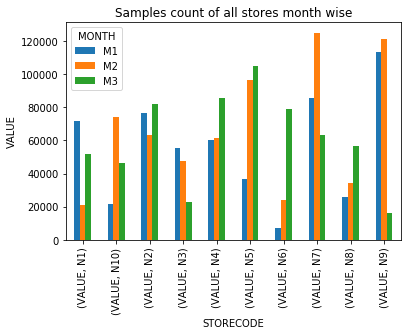

In [45]:
df.unstack().T.plot.bar()
plt.title('Samples count of all stores month wise')
plt.xlabel('STORECODE')
plt.ylabel('VALUE')
plt.show()

### Our bar is showing high variablity in months in same store
### this could occur due to samples not collected on daily basis
##### lets see which days samples are not collected from different stores and again in different month

In [15]:
def miss_days(mon,store):
    days=[]
    mn=data['DAY'][data['MONTH']==mon][data['STORECODE']==store].value_counts().index
    [days.append(i) for i in np.arange(1,31) if i not in list(mn)]
    return days

### missing days from each store monthly

In [16]:
months=data.MONTH.unique()
stores=data.STORECODE.unique()

In [17]:
m1=[]
m2=[]
m3=[]
for i in stores:
    m1.append(len(miss_days('M1',i)))
    m2.append(len(miss_days('M2',i)))
    m3.append(len(miss_days('M3',i)))

In [18]:
dt=pd.DataFrame({'M1':m1,'M2':m2,'M3':m3}, index=stores)

In [19]:
dt

,M1,M2,M3
N1,9,10,4
N2,7,11,12
N3,9,8,10
N4,11,7,2
N5,9,8,6
N6,12,9,9
N7,9,4,10
N8,7,10,6
N9,8,10,16
N10,4,8,5


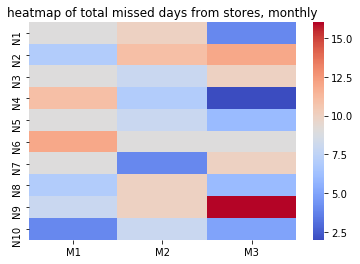

In [47]:
sns.heatmap(dt, cmap='coolwarm')
plt.title('heatmap of total missed days from stores, monthly')
plt.show()
# high maroon shade is showing missed days sample for particular month and store
# as see store N9 from month 3 has nearly 50% (half month) samples collected

### imputation/extrapolation technique for not collected samples from various days in a month can be:
##### examining which GRP of items is sold highly on which store on what day.
##### counting day wise samples frequency for particular STORE and MONTH means on which day how much billing gets done so we can impute for next or previous missed days.
##### filling missed days with high occured GRP  in store and month wise.

In [21]:
def top_grp_sale(df,mon, store):
    return df['GRP'][df['MONTH']==mon][df['STORECODE']==store].value_counts()

In [22]:
top_grp_sale(data,'M1','N1').head(5)
## top 5 GRP sale from month 1 and storecode 1

BISCUITS - CORE & NON CORE    683
CHOCOLATE                     373
SALTY SNACKS (2/97)           224
VERMICELLI & NOODLE           146
CONFECTIONERY - TOFFEE/HBC    125
Name: GRP, dtype: int64

In [23]:
grp=data[['GRP','MBRD','PRICE']]

In [24]:
grp_price_list=grp.drop_duplicates(keep='first')
grp_price_list.head()
## price for each grp of different manufacturing brand since there can be many GRP with same name(average case)

,GRP,MBRD,PRICE
0,BUTTER MARGR (4/94),AMUL,225.0
1,CONFECTIONERY - ECLAIRS,MELODY,95.0
2,CHOCOLATE,CADBURY SHOTS,10.0
3,PACKAGED TEA,WAGH BAKRI,108.0
4,ALL IODISED SALT,TATA,19.0


In [44]:
data[data['MONTH']=='M1'][data['STORECODE']=='N1']['DAY'].value_counts()
# we can see the sale frequency count for different days from month M1 and storecode N1
# we can take mean of it and assume that for missing days will be same sale frequency count(like 115 for all missed days from
# M1 and store N1)

8     149
7     137
11    134
9     134
14    129
4     128
29    127
26    125
13    124
12    121
5     120
6     119
25    114
17    114
30    105
16    104
10    103
15     94
20     91
21     84
28     70
Name: DAY, dtype: int64

In [26]:
miss_days('M1','N1')

[1, 2, 3, 18, 19, 22, 23, 24, 27]

In [27]:
# creating separates series for day, month and storecode to repeat as imputation
res_day, res_mon, res_store=pd.Series(), pd.Series(), pd.Series()
for mon in data['MONTH'].unique():
    for store in data['STORECODE'].unique():
        d=pd.Series(miss_days(mon, store))
        m=pd.Series([mon]*len(d))   #e.g. for 2 days there will be same no. of month so month will be repeat as days repeated 
        s=pd.Series([store]*len(d))
        # floor mean value of days sale frequenct count based on month and store
        rep=np.floor(data[data['MONTH']==mon][data['STORECODE']==store]['DAY'].value_counts().mean())
        # appending repeated series to specific series in each iteration
        res_day=res_day.append(d.repeat(rep), ignore_index=True)
        res_mon=res_mon.append(m.repeat(rep), ignore_index=True)
        res_store=res_store.append(s.repeat(rep), ignore_index=True)

In [28]:
res_day.size, res_mon.size, res_store.size

(9117, 9117, 9117)

In [29]:
# creating separates series for price and grp to repeat as imputation
result_value, result_grp=pd.Series(), pd.Series()
for mon in data['MONTH'].unique():
    for store in data['STORECODE'].unique():
        d=pd.Series(miss_days(mon, store))
        max_rep=np.floor(data[data['MONTH']==mon][data['STORECODE']==store]['DAY'].value_counts().mean()).astype(int)
        rep_value=data['VALUE'][data['MONTH']==mon][data['STORECODE']==store].head(max_rep)
        rep_grp=data['GRP'][data['MONTH']==mon][data['STORECODE']==store].head(max_rep)
        result_value=result_value.append(rep_value.repeat(len(d)), ignore_index=True)
        result_grp=result_grp.append(rep_grp.repeat(len(d)), ignore_index=True)

In [30]:
result_value.size, result_grp.size

(9117, 9117)

In [31]:
df_imputed=pd.DataFrame({'MONTH': res_mon, 'STORECODE': res_store, 'DAY':res_day, 'VALUE':result_value, 'GRP': result_grp})
df_imputed[df_imputed['MONTH']=='M1'][df_imputed['STORECODE']=='N1'].shape
# we can cross check ---> as for month M1 and store N1 there were 9 days missing and mean days frequency count was 115 so
# 115 for each days = 1035

(1035, 5)

In [32]:
df_imputed.head()

,MONTH,STORECODE,DAY,VALUE,GRP
0,M1,N1,1,225.0,BUTTER MARGR (4/94)
1,M1,N1,1,225.0,BUTTER MARGR (4/94)
2,M1,N1,1,225.0,BUTTER MARGR (4/94)
3,M1,N1,1,225.0,BUTTER MARGR (4/94)
4,M1,N1,1,225.0,BUTTER MARGR (4/94)


In [33]:
data.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [34]:
data1=data.loc[:,['MONTH','STORECODE','VALUE','GRP']]
data1.head()

,MONTH,STORECODE,VALUE,GRP
0,M1,N1,225.0,BUTTER MARGR (4/94)
1,M1,N1,95.0,CONFECTIONERY - ECLAIRS
2,M1,N1,10.0,CHOCOLATE
3,M1,N1,108.0,PACKAGED TEA
4,M1,N1,19.0,ALL IODISED SALT


In [35]:
# lets concatenate imputed and train dataset
final_data=pd.concat([data1,df_imputed], ignore_index=True)
final_data.drop('DAY',1,inplace=True)
final_data.head()

,GRP,MONTH,STORECODE,VALUE
0,BUTTER MARGR (4/94),M1,N1,225.0
1,CONFECTIONERY - ECLAIRS,M1,N1,95.0
2,CHOCOLATE,M1,N1,10.0
3,PACKAGED TEA,M1,N1,108.0
4,ALL IODISED SALT,M1,N1,19.0


In [307]:
import pickle

In [308]:
f=open('final_data','wb')
pickle.dump(final_data,f)
f.close()

In [4]:
# f=open('final_data', 'rb')
# data1=pickle.load(f)
# f.close()

In [36]:
test.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [301]:
test.shape

(2430, 4)

In [37]:
final_data.head(3)

,GRP,MONTH,STORECODE,VALUE
0,BUTTER MARGR (4/94),M1,N1,225.0
1,CONFECTIONERY - ECLAIRS,M1,N1,95.0
2,CHOCOLATE,M1,N1,10.0


In [38]:
test_total=[]
for i,j,k in zip(test['MONTH'],test['STORECODE'],test['GRP']):
    pred=final_data['VALUE'][final_data['MONTH']==i][final_data['STORECODE']==j][final_data['GRP']==k]
    if len(pred.value_counts().values)==0:
        test_total.append(0)
    else:
        test_total.append(pred.sum())

In [39]:
test_total=np.round(test_total)

In [40]:
test['TOTALVALUE']=test_total
test['TOTALVALUE']=test['TOTALVALUE'].astype(int)

In [313]:
file=open('final_test_data','wb')
pickle.dump(test,file)
file.close()

In [41]:
test.head(10)

,ID,STORECODE,MONTH,GRP,TOTALVALUE
0,1112535,N1,M1,AFTER SHAVE LOTIONS,0
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI,70
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03),560
3,1112547,N1,M1,ALL IODISED SALT,1373
4,1112551,N1,M1,ANTACIDS,143
5,1112555,N1,M1,ANTISEPTIC CREAMS,0
6,1112559,N1,M1,ANTISEPTIC LIQUIDS (4/97),50
7,1112563,N1,M1,BABY FOODS,0
8,1112567,N1,M1,BABY OILS / MASSAGE OILS,0
9,1112571,N1,M1,BATTERIES,476


In [42]:
submission=test.loc[:,['ID','TOTALVALUE']]

In [316]:
submission.to_csv('final_submission.csv', index=False)